Order Date
2015-01-31    14205.707
2015-02-28     4519.892
2015-03-31    55205.797
2015-04-30    27906.855
2015-05-31    23644.303
Freq: ME, Name: Sales, dtype: float64
ADF Statistic: -4.416136761430768
p-value: 0.00027791039276670677
The data is stationary.
AR Model AIC: 1037.0769748237271
AR Model BIC: 1046.1102872725787
ARMA Model AIC: 1105.158254946999
ARMA Model BIC: 1120.1278630342622
ARIMA Model AIC: 1105.580747260034
ARIMA Model BIC: 1111.1943502927577


/Users/abhi/Library/Python/3.9/lib/python/site-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/Users/abhi/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abhi/Library/Python/3.9/lib/python/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


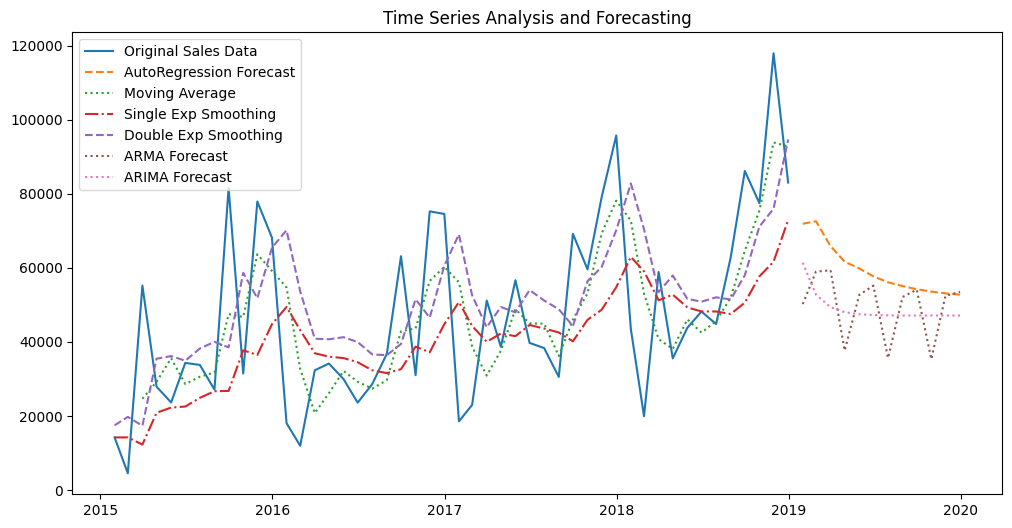

/var/folders/3g/jkc_wdzd5l76vkty4y3zddfc0000gn/T/ipykernel_13830/1166348205.py:85: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  "Date": pd.date_range(start=df.index[-1], periods=12, freq='M'),


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   48
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -549.790
Date:                Mon, 17 Mar 2025   AIC                           1105.581
Time:                        17:01:05   BIC                           1111.194
Sample:                    01-31-2015   HQIC                          1107.702
                         - 12-31-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.712e+04   5329.761      8.840      0.000    3.67e+04    5.76e+04
ar.L1          0.3970      0.133      2.989      0.003       0.137       0.657
sigma2        5.1e+08      0.082   6.18e+09      0.000     5.1e+08     5.1e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                 1.99
Prob(Q):                              0.81   Prob(JB):                         0.37
Heteroskedasticity (H):               1.04   Skew:                             0.42
Prob(H) (two-sided):                  0.95   Kurtosis:                         2.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.33e+25. Standard errors may be unstable.
"""

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.api import SimpleExpSmoothing, ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima.model import ARIMAResults

# Load dataset and ensure Order Date is parsed correctly
df = pd.read_csv("dataset/superstore_sales.csv")

# Convert "Order Date" to datetime format
df["Order Date"] = pd.to_datetime(df["Order Date"],dayfirst='True')

# Set "Order Date" as the index
df.set_index("Order Date", inplace=True)

# Check if the index is of datetime type
# print(df.index.dtype)  # Should print 'datetime64[ns]'

# Aggregate sales data by month
df = df.resample("ME").sum()["Sales"]

print(df.head())  # Verify the output

# Check stationarity
def test_stationarity(timeseries):
    result = adfuller(timeseries)
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    if result[1] <= 0.05:
        print("The data is stationary.")
    else:
        print("The data is non-stationary.")

test_stationarity(df)

# AutoRegression (AR)
model_ar = AutoReg(df, lags=3).fit()
forecast_ar = model_ar.predict(start=len(df), end=len(df)+11)
print("AR Model AIC:", model_ar.aic)
print("AR Model BIC:", model_ar.bic)

# Moving Average
window = 3
moving_avg = df.rolling(window=window).mean()

# Single & Double Exponential Smoothing
single_exp = SimpleExpSmoothing(df).fit(smoothing_level=0.2)
double_exp = ExponentialSmoothing(df, trend='add').fit()

# ARMA Model
from statsmodels.tsa.arima.model import ARIMA
model_arma = ARIMA(df, order=(3,0,3)).fit()
forecast_arma = model_arma.forecast(steps=12)
print("ARMA Model AIC:", model_arma.aic)
print("ARMA Model BIC:", model_arma.bic)

# ARIMA Model
model_arima = ARIMA(df, order=(1,0,0)).fit()


forecast_arima = model_arima.forecast(steps=12)
print("ARIMA Model AIC:", model_arima.aic)
print("ARIMA Model BIC:", model_arima.bic)

# Plot Results
plt.figure(figsize=(12,6))
plt.plot(df, label='Original Sales Data')
plt.plot(forecast_ar, label='AutoRegression Forecast', linestyle='dashed')
plt.plot(moving_avg, label='Moving Average', linestyle='dotted')
plt.plot(single_exp.fittedvalues, label='Single Exp Smoothing', linestyle='dashdot')
plt.plot(double_exp.fittedvalues, label='Double Exp Smoothing', linestyle='dashed')
plt.plot(forecast_arma, label='ARMA Forecast', linestyle='dotted')
plt.plot(forecast_arima, label='ARIMA Forecast', linestyle='dotted')
plt.legend()
plt.title("Time Series Analysis and Forecasting")
plt.show()

# Export Data for Tableau
forecast_df = pd.DataFrame({
    "Date": pd.date_range(start=df.index[-1], periods=12, freq='M'),
    "AR Forecast": forecast_ar.values,
    "ARMA Forecast": forecast_arma.values,
    "ARIMA Forecast": forecast_arima.values
})
forecast_df.to_csv("forecast_results.csv", index=False)


model_arima.summary()